<a href="https://colab.research.google.com/github/ghostpasha01/Data-Analysis-Total-/blob/main/Bank_Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AffinityPropagation
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("C://Users//Hp//Desktop//Top200 Proje//german_credit_data.csv")

In [ ]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [ ]:
data.drop(data.columns[0], inplace=True,axis=1)
print("Database has {} obverwations (customers) and {} columns (attributes).".format(data.shape[0],data.shape[1]))
print("Missing values in each column :\n {}".format(data.isnull().sum()))
print("Columns data types:\n{}".format(data.dtypes))



Database has 1000 obverwations (customers) and 9 columns (attributes).
Missing values in each column :
 Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64
Columns data types:
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object


In [ ]:
n_unique=data.nunique()
print("number of unique values :\n {}".format(n_unique))

number of unique values :
 Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64


In [ ]:
print("Unique values in each categorical column:")
for col in data.select_dtypes(include=[object]):
    print(col,":",data[col].unique())

Unique values in each categorical column:
Sex : ['male' 'female']
Housing : ['own' 'free' 'rent']
Saving accounts : [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account : ['little' 'moderate' nan 'rich']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


In [ ]:
def scatters(data, h=None, pal=None):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="Credit amount",y="Duration",hue=h,palette=pal,data=data,ax=ax1)
    sns.scatterplot(x="Age",y="Credit amount",hue=h,palette=pal,data=data,ax=ax2)
    sns.scatterplot(x="Age",y="Duration",hue=h,palette=pal, data=data,ax=ax3)
    plt.tight_layout()

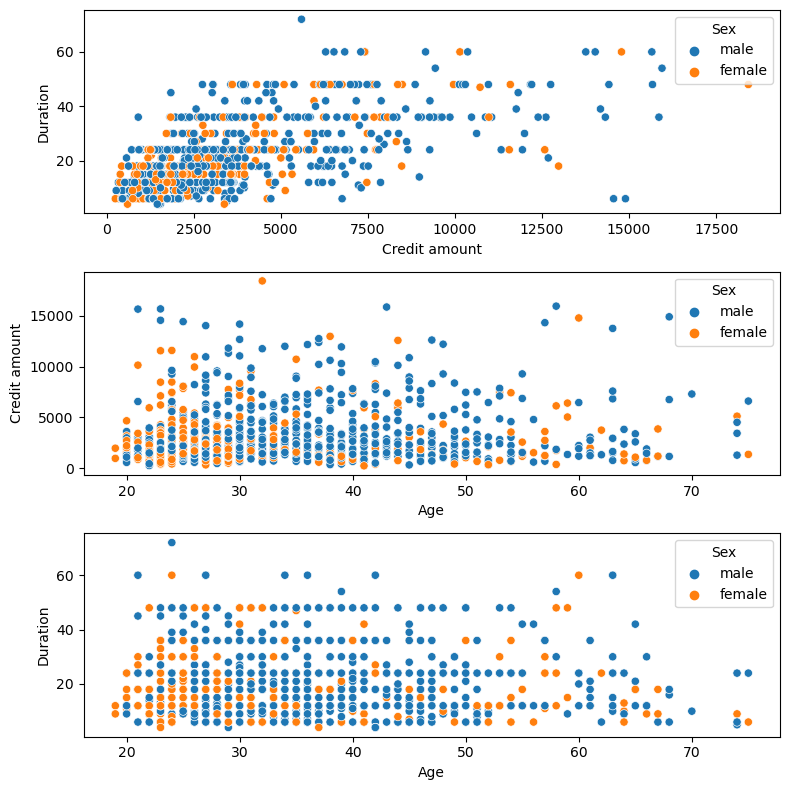

In [ ]:
scatters(data,h="Sex")

AttributeError: 'JointGrid' object has no attribute 'annotate'

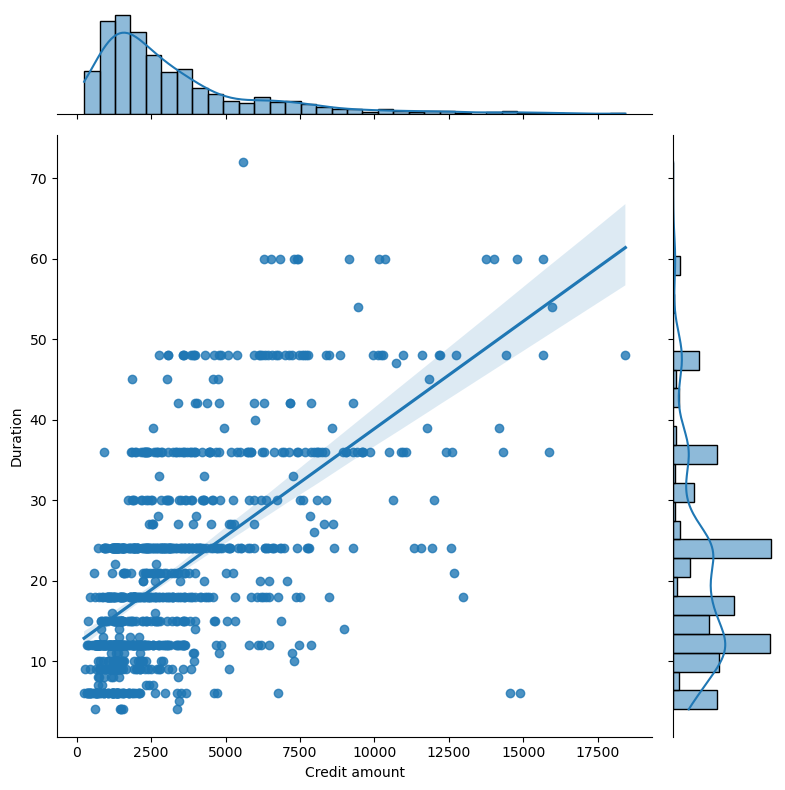

In [ ]:
import scipy.stats as stats
r1 = sns.jointplot(x="Credit amount",y="Duration", data=data, kind="reg", height=8)
r1.annotate(stats.pearsonr)
plt.show()

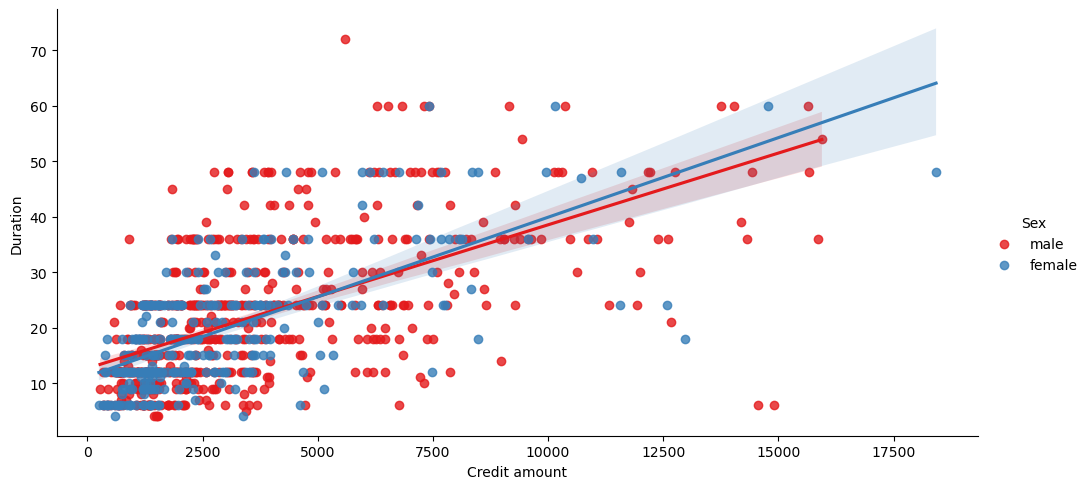

In [ ]:
sns.lmplot(x="Credit amount",y="Duration",hue="Sex",data=data,palette="Set1",aspect=2)
plt.show()

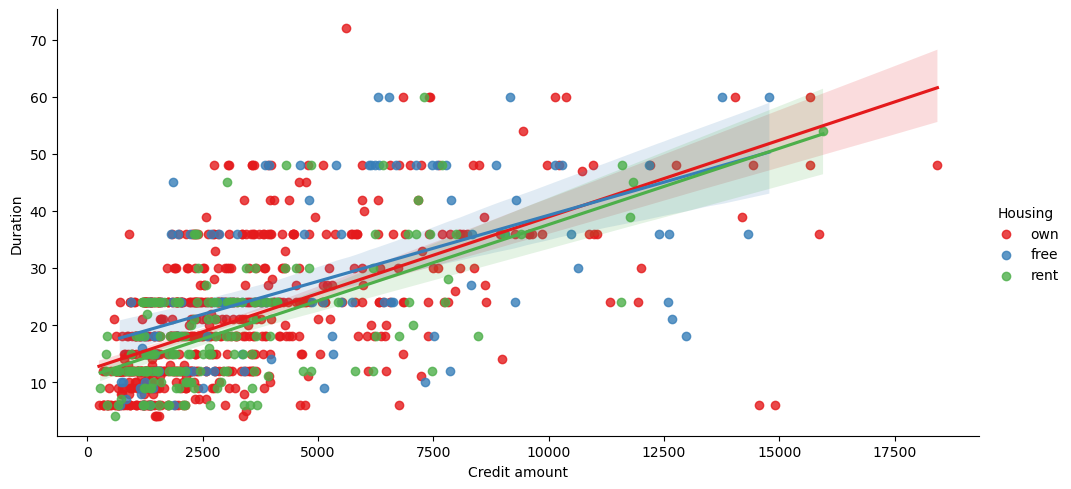

In [ ]:
sns.lmplot(x="Credit amount",y="Duration",hue="Housing",data=data,palette="Set1",aspect=2)
plt.show()

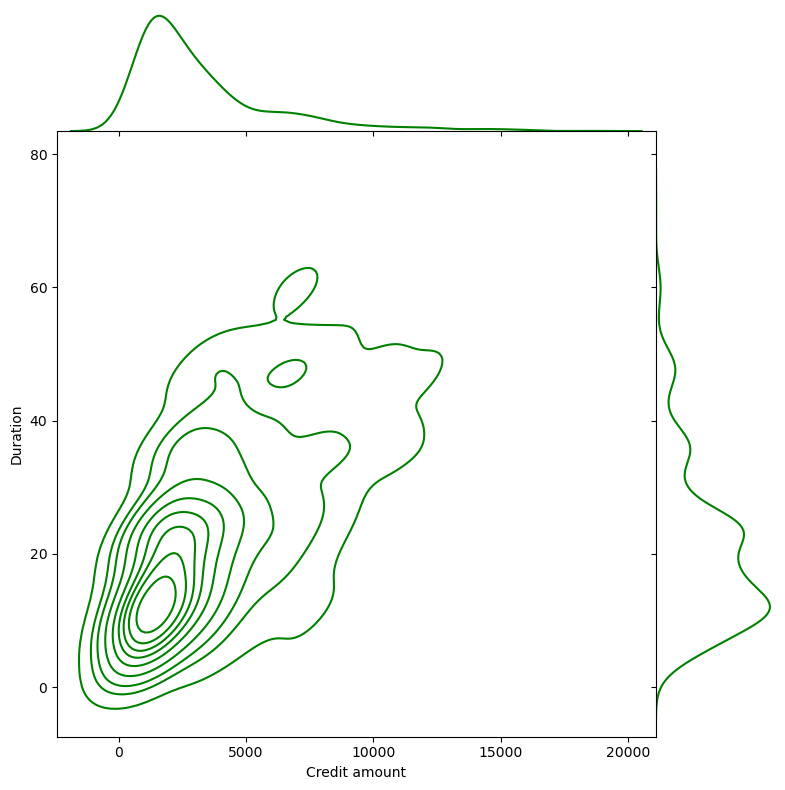

In [ ]:
sns.jointplot("Credit amount","Duration",data=data,kind="kde",space=0,color="g",height=8)
plt.show()

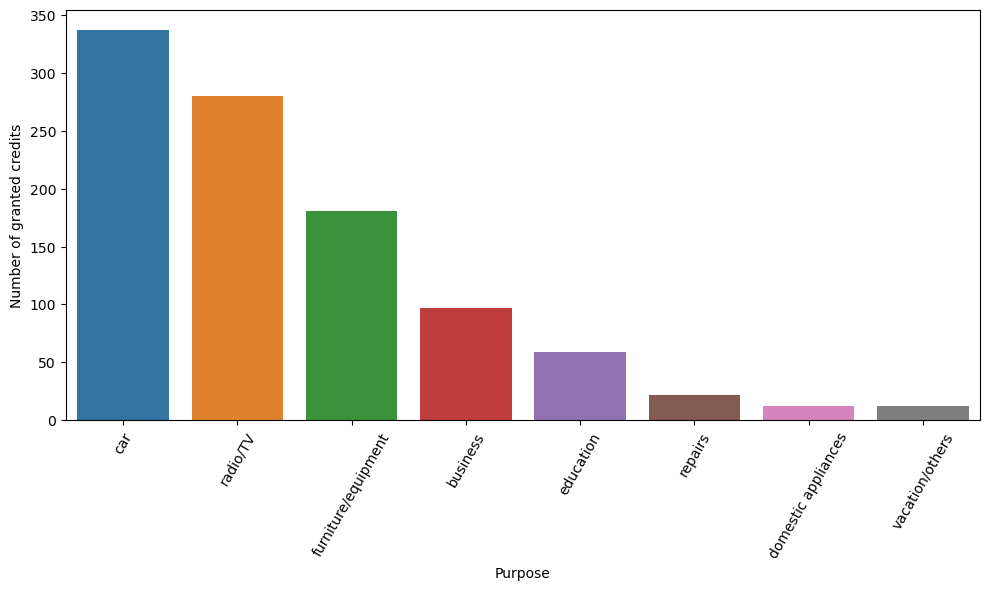

In [ ]:
n_credits=data.groupby("Purpose")["Age"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"],ascending=False,inplace=True)
plt.figure(figsize=(10,6))
bar=sns.barplot(x="Purpose",y="Count",data=n_credits)
bar=sns.barplot(x="Purpose",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(),rotation=60)
plt.ylabel("Number of granted credits")
plt.tight_layout()

In [ ]:
def boxes(x,y,h,r=45):
    fig,ax=plt.subplots(figsize=(10,6))
    box=sns.boxplot(x=x,y=y,hue=h,data=data)
    box.set_xticklabels(box.get_xticklabels(),rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

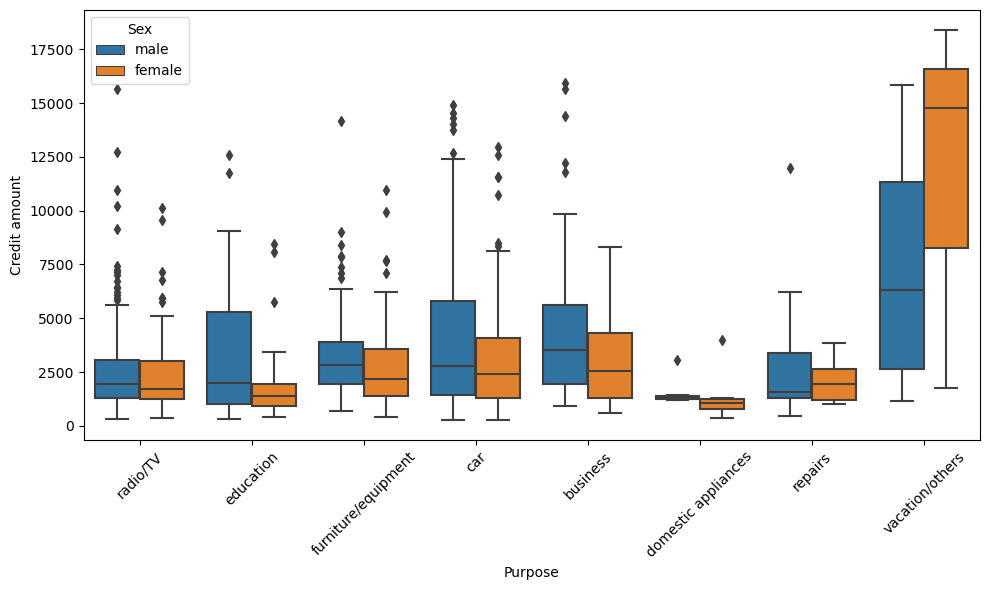

In [ ]:
boxes("Purpose","Credit amount","Sex")

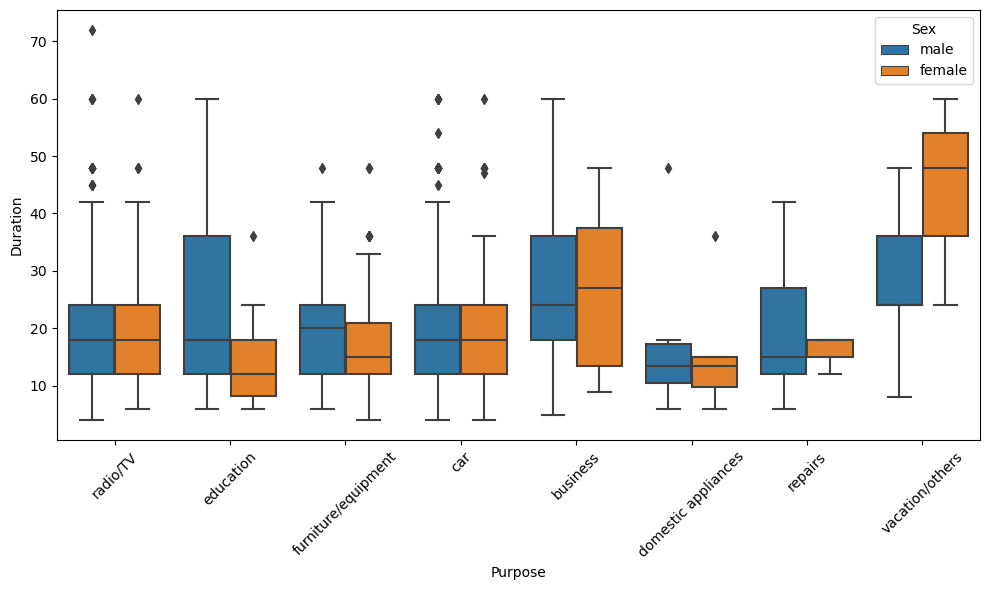

In [ ]:
boxes("Purpose","Duration","Sex")


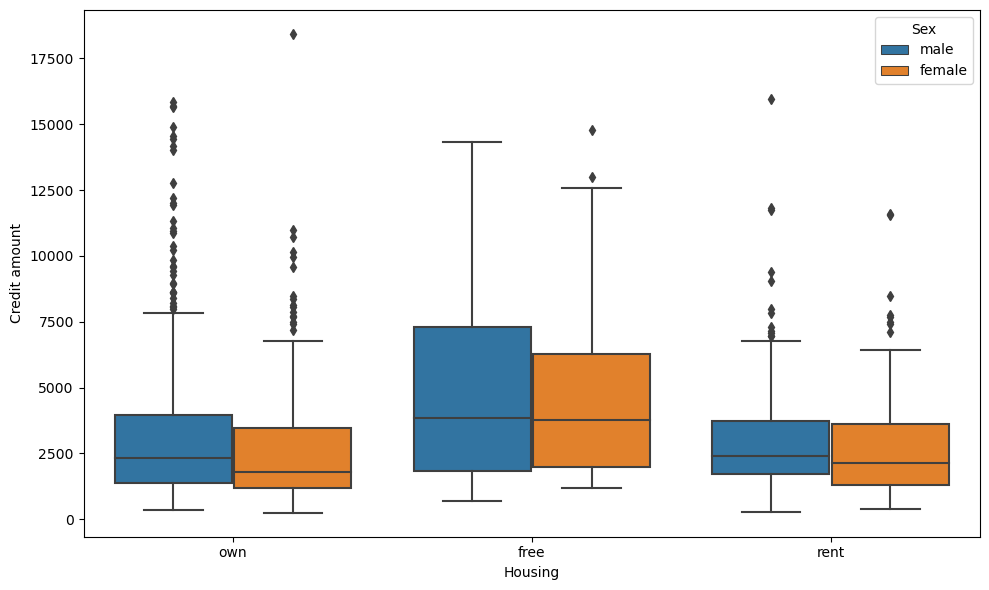

In [ ]:
boxes("Housing","Credit amount","Sex",r=0)

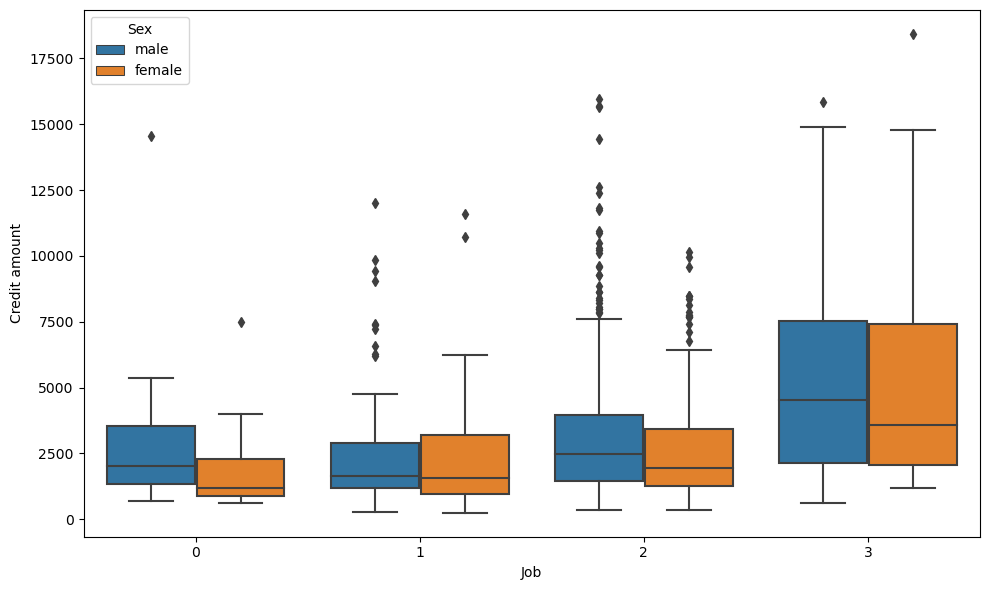

In [ ]:
boxes("Job","Credit amount","Sex",r=0)


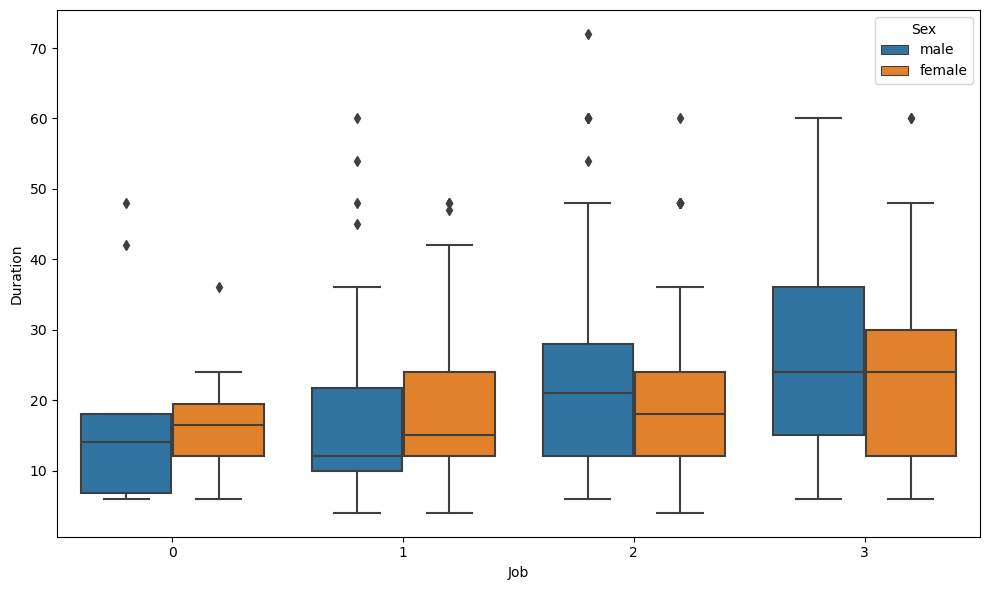

In [ ]:
boxes("Job","Duration","Sex",r=0)


In [ ]:
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["Credit amount"], ax=ax2)
    sns.distplot(df["Duration"], ax=ax3)
    plt.tight_layout()

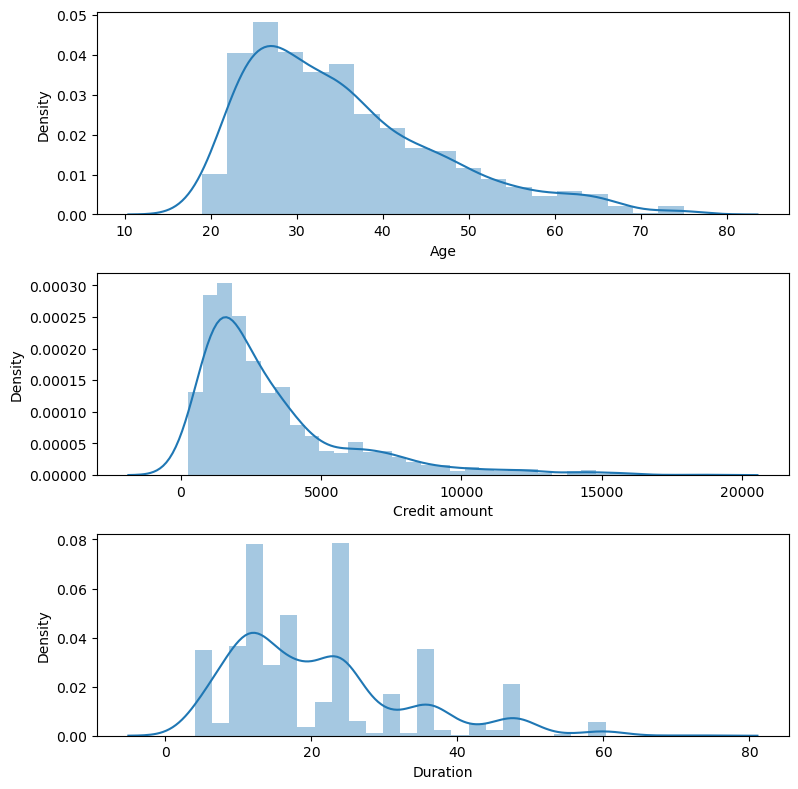

In [ ]:
distributions(cluster_data)


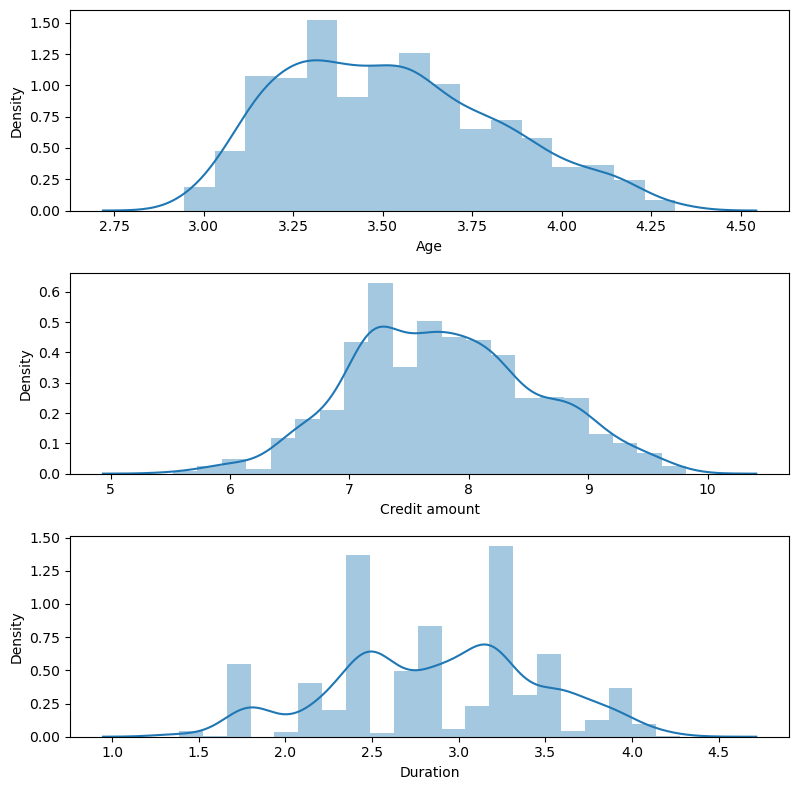

In [ ]:
cluster_log = np.log(cluster_data)
distributions(cluster_log)

In [ ]:
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_log)

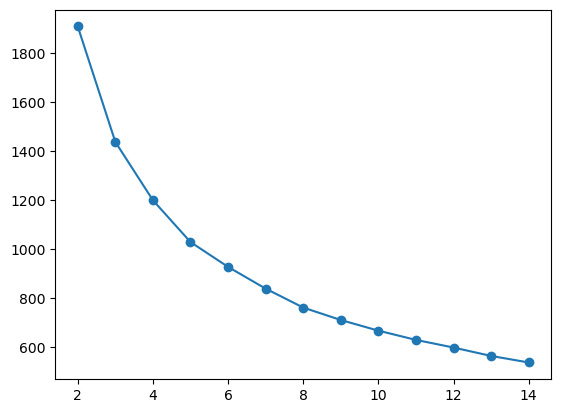

In [ ]:
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')

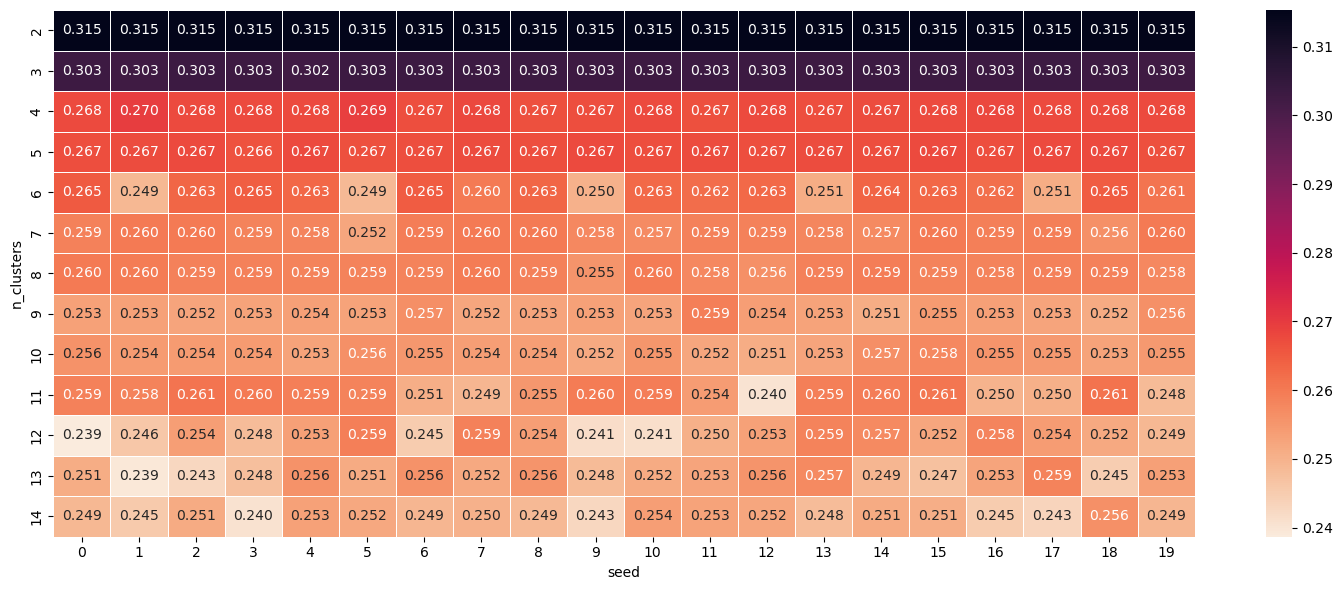

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
random_range = range(0,20)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(cluster_scaled)
        silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
        results.append([c,r,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15,6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()


In [ ]:
kmeans_sel = KMeans(n_clusters=3, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

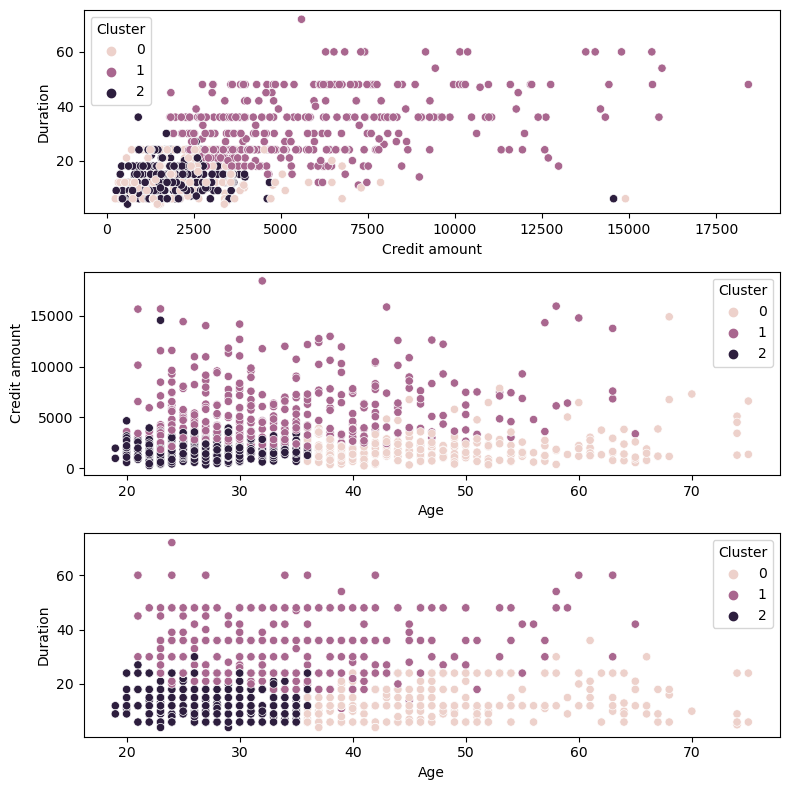

In [ ]:
scatters(clustered_data, 'Cluster')


In [ ]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km

,Age,Credit amount,Duration
Cluster,,,
0,48.5,1970.3,13.9
1,34.0,5665.4,32.2
2,27.7,1736.3,14.3


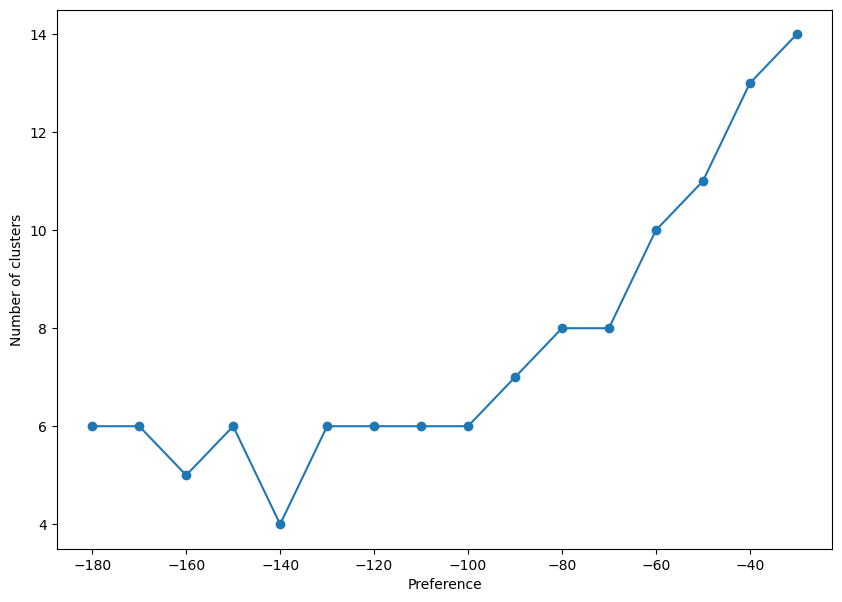

In [ ]:
preferences = np.arange(-30,-190,-10)
clusters = []

for p in preferences:
    af = AffinityPropagation(preference=p, damping=0.6, max_iter=400, verbose=False).fit(cluster_scaled)
    labels_af = pd.DataFrame(af.labels_)
    clusters.append(len(af.cluster_centers_indices_))

plt.figure(figsize=(10,7))
plt.xlabel("Preference")
plt.ylabel("Number of clusters")
plt.plot(preferences,clusters, marker='o')

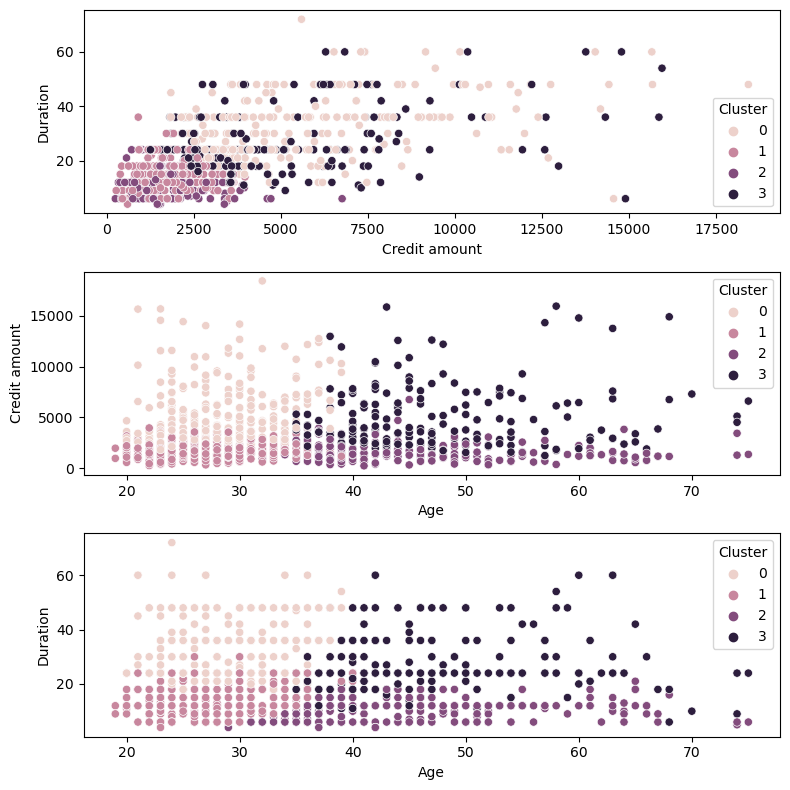

In [ ]:
af = AffinityPropagation(preference=-140, damping=0.6, verbose=False).fit(cluster_scaled)
labels_af = pd.DataFrame(af.labels_)
n_clusters_ = len(af.cluster_centers_indices_)

clustered_data_af = cluster_data.assign(Cluster=labels_af)
scatters(clustered_data_af,'Cluster')

grouped_af = clustered_data_af.groupby(['Cluster']).mean().round(1)

In [ ]:
grouped_af = clustered_data_af.groupby(['Cluster']).mean().round(1)
grouped_af

,Age,Credit amount,Duration
Cluster,,,
0,28.7,5593.7,32.2
1,27.9,1654.3,15.1
2,46.0,1551.7,10.7
3,47.5,4977.9,27.6
